# Lesson5.基本优化思想与最小二乘法

In [1]:
import numpy as np
import torch

## 一、简单线性回归的机器学习建模思路

### 1.回顾简单线性回归建模问题

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
A = torch.arange(1, 5).reshape(2, 2).float()
A


tensor([[1., 2.],
        [3., 4.]])

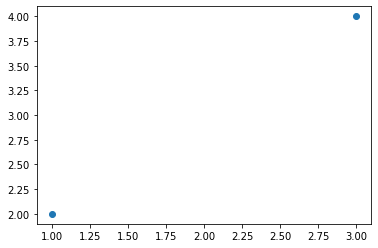

In [5]:
# 绘制点图查看两个点的位置
plt.plot(A[:,0], A[:, 1], 'o')

如果更进一步，我们希望在二维空间中找到一条直线，来拟合这两个点，也就是所谓的构建一个线性回归模型，我们可以设置线性回归方程如下：
$$y=ax+b$$

### 2.转化为优化问题

可以利用逆矩阵求解，但不通用。

最优化问题的转化分为两步，
- 其一是确定优化数值指标
- 其二则是确定优化目标函数
- 两者相辅相成



就是希望方程的预测值和真实值相差较小。假设真实的y值用y表示，预测值用ŷ表示，带入a、b参数，则有数值表示如下：

|$ x^{(i)} $| $ y^{(i)} $ | $ ŷ^{(i)} $ |
| :------:| :------: | :------ |
| 1 | 2 | a+b |
| 3 | 4 | 3a+b |
| ŷ表示 | 对应预测值 | 

$$ŷ_1 = 1*a + b  = a + b$$
$$ŷ_2 = 3*a + b  = 3a + b$$

希望真实值和预测值尽可以接近，使用误差平方和SSE
- SSE代表着真实值和预测值之间的差值（误差平方和），因此也被称为损失函数（预测值距真实值的损失）
  - 只有拟合系数的模型，才有损失函数

### 3.最优化问题的求解方法

- 图形展示目标函数

&emsp;&emsp;为了更好的讨论目标函数（SSE）求最小值的过程，对于上述二元函数来说，我们可以将其展示在三维空间内。此处我们可以使用Python中matplotlib包和Axes3D函数进行三维图像绘制

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
a,b = np.meshgrid(x,y)

SSE = (2-a-b)**2 +(4-3*a-b)**2

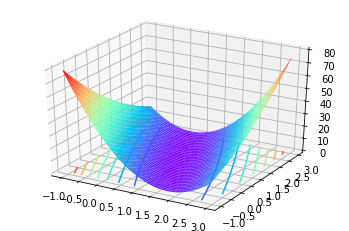

In [9]:
#————————————————————————————绘制函数图像————————————————————————————
ax = plt.axes(projection='3d')

ax.plot_surface(a, b, SSE, cmap='rainbow')
#  绘制等高线
ax.contour(a, b, SSE, zdir='z', offset=0, cmap="rainbow")  #生成z方向投影，投到x-y平面
plt.show()


- 函数的凹凸性

不难看出，目标函数是个整体看起来“向下凸”的函数，函数的凹凸性是函数的重要性质，首先我们给出凸函数的一般定义，对于任意一个函数，如果函数f(x)上存在任意两个点，$x_1, x_2$，且      
$$ (f(x_1) + f(x_2))/2 >= f((x_1 + x_2)/2) $$

- **凸函数，存在全局的最小值**

凸函数求解最小值的一般方法：      
1. 对于一元函数，如果存在导数为0的点，则该点就是最小值点；      
2. 对于多元函数，如果存在某一点，使得函数的各个自变量的偏导数都为0，则该点就是最小值点。 
        
因此，对于凸函数的最小值求解，最基本的出发点就是寻找导数为0的点。而最小二乘法也是基于偏导函数取值为0联立的方程组进行的求解。

### 4.机器学习建模一般流程

**优化建模的一般思路：**
- Step 1：提出基本模型  
- Step 2：确定损失函数和目标函数
  - 损失函数不是模型，是模型参数所组成的函数
- Step 3：根据目标函数特性，选择优化方法，求解目标函数

## 二、第一个优化算法：最小二乘法

### 1.最小二乘法的代数表示方法

首先，假设多元线性方程有如下形式
$$ f(x) = w_1x_1+w_2x_2+...+w_dx_d+b $$
令$w = (w_1,w_2,...w_d)$，$x = (x_1,x_2,...x_d)$，则上式可写为
$$ f(x) = w^Tx+b $$ 

> 我们将线性回归自变量系数命名为w，其实是weight的简写，意为自变量的权重。

优化目标可以写为
$$ SSE = \sum^m_{i=1}(f(x_i)-y_i)^2 = E_(w,b) $$
通过偏导为0求得最终结果的最小二乘法求解过程为：
$$ \begin{align} \frac{\partial{SSE_(w,b)}}{\partial{(w)}} 
& = 2(w\sum^m_{i=1}x^2_i - \sum^m_{i=1}(y_i-b)x_i) = 0  \end{align} $$

$$ \begin{align} \frac{\partial{SSE_(w,b)}}{\partial{(b)}} 
& = 2(mb - \sum^m_{i=1}(y_i-wx_i)) = 0  \end{align}  $$ 

从而
$$ w = \frac{\sum^m_{i=1}y_i(x_i-\bar{x})
}{\sum^m_{i=1}x^2_i-\frac{1}{m}(\sum^m_{i=1}x_i)^2
} $$

$$ b = \frac{1}{m}\sum^m_{i=1}(y_i-wx_i)
$$

其中，$\bar x = \frac{1}{m}\sum^m_{i=1}x_i，x_i$为x的均值，并且$(x_i,y_i)$代表二维空间中的点。

### 2.最小二乘法的矩阵表示形式

原方程组可表示为$ A * X^T = B $

更为一般的情况下，多元线性回归方程为
$$ f(x) = w_1x_1+w_2x_2+...+w_dx_d+b $$
令
$$\hat w = (w_1,w_2,...,w_d,b)$$
$$\hat x = (x_1,x_2,...,x_d,1)$$
- $\hat w$：方程系数所组成的向量，并且我们将自变量系数和截距放到了一个向量中，此处$\hat w$就相当于前例中的a、b组成的向量(a,b)；
- $\hat x$：方程自变量和1共同组成的向量；
因此，方程可表示为
  $$f(x) = \hat w * \hat x^T$$


另外，我们将所有自变量的值放在一个矩阵中，并且和此前A矩阵类似，为了捕捉截距，添加一列全为1的列在矩阵的末尾，设总共有m组取值，则
$$ X = 
\left [\begin{array}{cccc}
x_{11} &x_{12} &... &x_{1d} &1 \\
x_{21} &x_{22} &... &x_{2d} &1 \\
... &... &... &... &1 \\
x_{m1} &x_{m2} &... &x_{md} &1 \\
\end{array}\right]
$$

对应到前例中的A矩阵，A矩阵就是拥有一个自变量、两个取值的X矩阵。令y为因变量的取值，则有

$$ y =  \left [\begin{array}{cccc}
y_1 \\
y_2 \\
. \\
. \\
. \\
y_m \\
\end{array}\right] $$


此时，SSE可表示为：
$$SSE = ||y - X\hat w^T||_2^2 = (y - X\hat w^T)^T(y - X\hat w^T) = E(\hat w)$$

根据最小二乘法的求解过程，令$E(\hat w)$对$\hat w$求导方程取值为0，有

$$
\begin{aligned}
\frac{E(\hat w)}{\partial{\boldsymbol{\hat w}}} 
&= \frac{\partial{||\boldsymbol{y} - \boldsymbol{X\hat w^T}||_2}^2}{\partial{\boldsymbol{\hat w}}}
\\
&= \frac{\partial(\boldsymbol{y} - \boldsymbol{X\hat w^T})^T(\boldsymbol{y} - \boldsymbol{X\hat w^T})}{\partial{\boldsymbol{\hat w}}}
\\
\\ \because &\ (A-B)^T = A^T - B^T并且(AB)^T = B^T*A^T \\ \\
\therefore& 上式=\frac{\partial(\boldsymbol{y}^T - \boldsymbol{\hat w X^T})(\boldsymbol{y} - \boldsymbol{X\hat w^T})}{\partial{\boldsymbol{\hat w}}}
\\
&=\frac{\partial(\boldsymbol{y}^T\boldsymbol{y} - \boldsymbol{\hat w X^Ty}-\boldsymbol{y}^T\boldsymbol{X \hat w^T} +\boldsymbol{\hat wX^T}\boldsymbol{X\hat w^T})}
{\partial{\boldsymbol{\hat w}}}\\ 
&= 0 - \boldsymbol{X^Ty} - \boldsymbol{X^Ty} + 2\boldsymbol{X^TX\hat w ^T}\\
&= \boldsymbol{X^TX\hat w^T} - \boldsymbol{X^Ty} = 0
\\
&值得注意的是，在矩阵求导中，a为常数，有如下规则：
\begin{equation}
\\\frac{\partial{a}}{\partial{A}} = 0, \ \ \ \frac{\partial{A^TB^TC}}{\partial{A}} = B^TC, \ \ \ \frac{\partial{C^TBA}}{\partial{A}} = B^TC, \ \ \ 
\frac{\partial{A^TBA}}{\partial{A}} = (B+B^T)A
\end{equation}
\end{aligned}
$$ 

进一步可得
$$X^TX\hat w^T = X^Ty$$

要使得此式有解，等价于$X^TX$（也被称为矩阵的交叉乘积crossprod存在逆矩阵，若存在，则可解出

$$\hat w ^T = (X^TX)^{-1}X^Ty$$

### 3.最小二乘法的简单实现

In [27]:
X= torch.tensor([[1,1],[3,1]]).float()
X

tensor([[1., 1.],
        [3., 1.]])

In [20]:
y = torch.tensor([2,4]).float().reshape(2,1)
y

tensor([[2.],
        [4.]])

In [21]:
X.t()

tensor([[1., 3.],
        [2., 4.]])

In [28]:
w = torch.mm(torch.mm(torch.inverse(torch.mm(X.t(),X)),X.t()),y)
w

tensor([[1.0000],
        [1.0000]])

- 调用最小二乘法函数`torch.lstsq(B, A)`进行求解
  - 先输入y 在输入X
  - 第一个参数是因变量张量
  - 第二个参数是自变量张量
  - 同时返回结果还包括QR矩阵分解的结果

In [29]:
torch.lstsq(y,X)

g:\py\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:4169.)
  """Entry point for launching an IPython kernel.


torch.return_types.lstsq(
solution=tensor([[1.0000],
        [1.0000]]),
QR=tensor([[-3.1623, -1.2649],
        [ 0.7208, -0.6325]]))

- `linalg.norm`函数求向量或矩阵的范数

In [30]:
t = torch.tensor([-1,2.])
t

tensor([-1.,  2.])

In [31]:
torch.sqrt(torch.tensor(5.))

tensor(2.2361)

In [32]:
# 输入参数，求解L1范数，个元素的绝对值之和
torch.linalg.norm(t, 1)

tensor(3.)

### 4.反向验证导数为零

&emsp;&emsp;当然，我们也可以反向验证，看下损失函数SSE在a=1，b=1时偏导数是否都为0。此时就需要借助PyTorch中的autograd模块来进行偏导计算。

- autograd模块是PyTorch中的自动微分模块
- 需要在创建Tensor时，通过设置requires_grad属性为True、规定张量可微分即可。
- 查看可微分性`.requires_grad`
  

In [34]:
a = torch.tensor(1.,requires_grad = True)  # 默认是False
a

tensor(1., requires_grad=True)

此时a就是一个可微分的张量，requires_grad是a的一个属性，可以查看可以修改。

In [35]:
# 查看可微分性
a.requires_grad

True

In [36]:
# 修改可微分性
a.requires_grad = False
a.requires_grad

False

In [47]:
a.requires_grad = True

In [48]:
b = torch.tensor(1.,requires_grad = True)
b

tensor(1., requires_grad=True)

创建损失函数
$$(y_1 - ŷ_1)^2 + (y_2 - ŷ_2)^2 $$     
$$=  (2 - a - b)^2 + (4 - 3a - b)^2$$    

In [49]:
sse = torch.pow((2 - a - b), 2) + torch.pow((4 - 3 * a - b), 2)

使用`torch.autograd.grad`进行偏导运算，并输出a=1、b=1时偏导数的值

In [50]:
torch.autograd.grad(sse,[a, b])

# 至此，也可验证(1,1)是损失函数的最小值点。

(tensor(-0.), tensor(-0.))

- `torch.autograd.grad(对象，[参数1，参数2,...])`函数      
torch.autograd.grad是通用微分函数，当只输入一个自变量时计算结果就是导数，输入多个自变量时则会计算偏导数

In [51]:
x = torch.tensor(1.,requires_grad=True)
x

tensor(1., requires_grad=True)

In [52]:
y = x ** 2 

In [53]:
# 导数计算结果
torch.autograd.grad(y,x)

(tensor(2.),)

当然，微分计算作为神经网络优化的核心，autograd模块的功能远不仅于此，更多的微分运算，我们将在下一节继续讲解。